# Loading LS 7 data from the datacube

This notebook will briefly discuss how to load data from the datacube.

**Requirements:**
* A running data cube created via 01 - Getting Started

In [1]:
# This next line enables interactive plots for use later in the notebook
%matplotlib notebook

## Importing the datacube module

To start with, we'll import the datacube module and load an instance of the datacube and call our application name *load-data-example*. The application name can be anything, its used in logging information so you can trace results etc using the name.
We'll keep this example satisfying in that you can see some data quickly. Later as we look at more specific products and analysis we'll introduce more variants of the loading process.

In [2]:
import datacube
dc = datacube.Datacube(app='load-data-example')

/home/jovyan/.local/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
data = dc.load(product='ls7_usgs_sr_albers', 
        x=(-2.05, -2.17), y=(8.25, 8.35), measurements=['red', 'green', 'blue'],
         output_crs='epsg:3577',resolution=(-30,30))

In [4]:
data


<xarray.Dataset>
Dimensions:  (time: 1, x: 531, y: 601)
Coordinates:
  * time     (time) datetime64[ns] 2015-12-12T10:28:23.557965
  * y        (y) float64 -7.343e+06 -7.343e+06 -7.343e+06 -7.343e+06 ...
  * x        (x) float64 -1.412e+07 -1.412e+07 -1.412e+07 -1.412e+07 ...
Data variables:
    red      (time, y, x) int16 1142 -9999 -9999 -9999 -9999 -9999 -9999 ...
    green    (time, y, x) int16 957 -9999 -9999 -9999 -9999 -9999 -9999 ...
    blue     (time, y, x) int16 877 -9999 -9999 -9999 -9999 -9999 -9999 ...
Attributes:
    crs:      epsg:3577

<IPython.core.display.Javascript object>


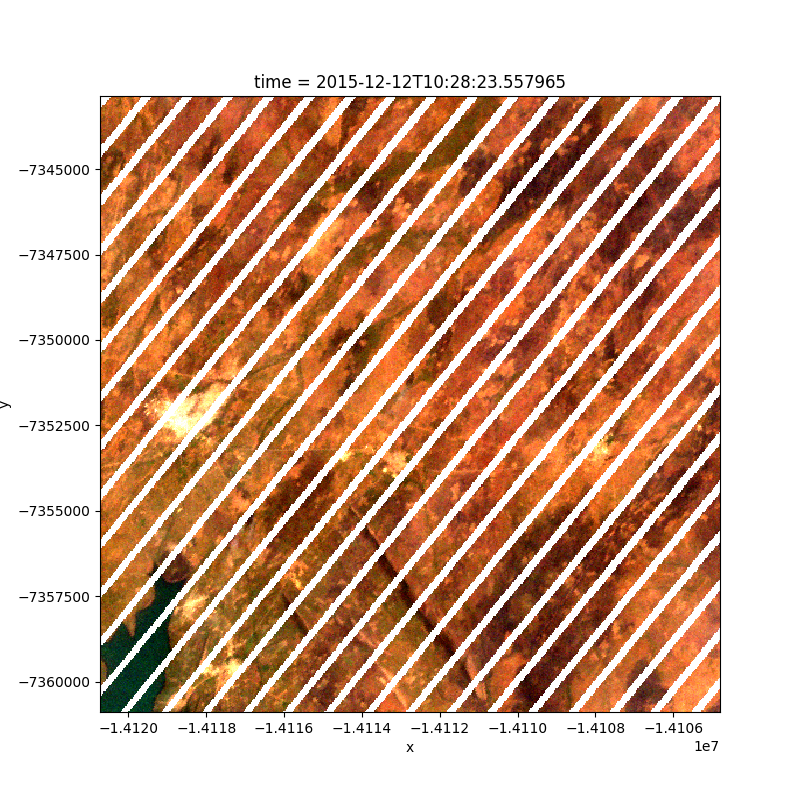

In [5]:
from datacube.storage import masking

# Set all nodata pixels to `NaN`:
data = masking.mask_invalid_data(data)
# Set all invalid data to `NaN` - valid range for USRS SR is 0 to 10000, but the surface reflectance product can have values just outside this range
# We remove them so the image drawn isn't impacted by them
data = data.where((data >= 0) & (data<=10000))

# Select a time slice from the EO data and combine the bands into a 3 band array
image_array = data[['red', 'green', 'blue']].isel(time=0).to_array()
# Show the image
image_array.plot.imshow(robust=True, figsize=(8, 8))


More information on the load function see the API docs: :py:meth:`~datacube.Datacube.load`

# Show/Hide error information
Yep, here is it again in case you need it

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_error').hide();
 $('div.output_stderr').hide();
 } else {
 $('div.output_error').show();
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
<form action="javascript:code_toggle_err()"><input type="submit" value="Click here to toggle on/off the error output."></form>''')
